In [3]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.pyplot import cycler
mpl.style.use('classic')

from astropy.table import Table
from astropy import units as u
from astropy.constants import G

import mesa_helper as mh
import os
import shutil

%matplotlib inline

In [4]:
mJtomSun = u.jupiterMass.to(u.solMass)
mJtoGrams = u.jupiterMass.to(u.g)

rJtorSun = u.jupiterRad.to(u.solRad)
rJtoCm = u.jupiterRad.to(u.cm)

print(mJtomSun)

0.0009545942339693249


In [5]:
# xq is fraction of (Mstar - Mcenter) exterior to cell q
# for our purposes Mcenter will be 0 always, so xq is fraction of Mstar exterior to q

# ith column gives mass fraction of species i in cell q.
composition_table_column_names = ['xq', 'h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24']
composition = Table.read("./composition.dat", format="ascii.fast_no_header", names=composition_table_column_names, data_start=1, guess=False, fast_reader={'exponent_style': 'fortran'})
print(composition)


# xq is fraction of (Mstar - Mcenter) exterior to cell q
# for our purposes Mcenter will be 0 always, so xq is fraction of Mstar exterior to q

# entropy column is specific entropy in units of erg K^-1 g^-1
entropy_table_column_names=['xq', 'entropy']
entropy = Table.read("./entropy.dat",format="ascii.fast_no_header",names=entropy_table_column_names, data_start=1, guess=False, fast_reader={'exponent_style': 'fortran'})
print(entropy)

# xq is fraction of (Mstar - Mcenter) exterior to cell q
# for our purposes Mcenter will be 0 always, so xq is fraction of Mstar exterior to q

# AM column is specific AM in units of cm^2 s^-1
angular_momentum_table_column_names = ['xq', 'AM']
AM = Table.read("./angular_momentum.dat",format="ascii.fast_no_header",names=angular_momentum_table_column_names, data_start=1, guess=False, fast_reader={'exponent_style': 'fortran'})
print(AM)


          xq                   h1         ...          mg24        
---------------------- ------------------ ... ---------------------
4.0001335577244395e-13 0.6989932523344085 ... 0.0040772218292557385
 1.469269150788932e-12 0.6989932523344085 ... 0.0040772218292557385
 3.009703597456337e-12 0.6989932523344085 ... 0.0040772218292557385
 5.293210314505359e-12 0.6989932523344086 ... 0.0040772218292557385
 8.319789301935998e-12 0.6989932523344086 ... 0.0040772218292557385
1.2148615446960775e-11 0.6989932523344083 ... 0.0040772218292557385
1.7315926470473638e-11 0.6989932523344083 ... 0.0040772218292557385
  2.69517741458003e-11 0.6989932523344081 ... 0.0040772218292557385
 4.676481424326084e-11 0.6989932523344072 ... 0.0040772218292557385
 9.270995082744092e-11 0.6989932523344037 ... 0.0040772218292557385
                   ...                ... ...                   ...
    0.9999789417002226                0.0 ...  0.004077221830638504
    0.9999862293710636                0.0 ...  0

In [10]:
def get_cycle(cmap, N=None, use_index="auto"):
    if isinstance(cmap, str):
        if use_index == "auto":
            if cmap in ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']:
                use_index=True
            else:
                use_index=False
        cmap = matplotlib.colormaps[cmap]
    if not N:
        N = cmap.N
    if use_index=="auto":
        if cmap.N > 100:
            use_index=False
        elif isinstance(cmap, LinearSegmentedColormap):
            use_index=False
        elif isinstance(cmap, ListedColormap):
            use_index=True
    if use_index:
        ind = np.arange(int(N)) % cmap.N
        return cycler("color",cmap(ind))
    else:
        colors = cmap(np.linspace(0,1,N))
        return cycler("color",colors)

def plot_mass_fractions(composition_table, species_to_plot=['h1', 'he3', 'he4', 'c12', 'n14', 'o16', 'ne20', 'mg24'], 
                        color_list = [],
                        save=False, savefilename=None):

    num_cells = len(composition_table)
    
    fig, ax  = plt.subplots(1,1,figsize=(8,6))
    ax.set_prop_cycle(get_cycle('tab10', 9))

    for i, species in enumerate(species_to_plot):
        ax.plot(composition_table['xq'], composition_table[species], linestyle='-',marker='None',label=species)

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('mass exterior to cell')
    ax.set_ylabel('mass fraction')
    ax.legend(loc='best')
    ax.set_xlim(1.e-1,1.)
    ax.set_ylim(1.e-10,1.)
    
    if save is False:
        plt.show()
    else:
        plt.savefig(savefilename,bbox_inches='tight')
        
    return

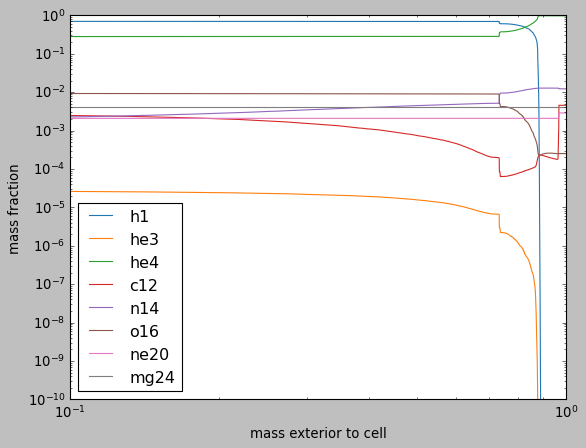

In [11]:
plot_mass_fractions(composition)